# Programming Exercise 7:
# K-means Clustering and Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
from IPython.display import Image

## 1 K-means Clustering

### 1.1 Implementing K-means

### 1.1.1 Finding closest centroids

In [2]:
def findClosestCentroids(X, centroids):
    idx = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        dist = np.sum(np.power(X[i] - centroids, 2), axis=1)
        idx[i] = np.argmin(dist)
    return idx

### 1.1.2 Computing centroid means

In [3]:
def computeCentroids(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i] = np.mean(X[idx == i], axis=0)
    return centroids

In [4]:
data = loadmat("ex7data2.mat")
X = data["X"]
print(X.shape)

(300, 2)


In [5]:
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = findClosestCentroids(X, initial_centroids)
print(idx[:3])  # 0 2 1

[0. 2. 1.]


In [6]:
centroids = computeCentroids(X, idx, K)
print(centroids)
# 2.428301 3.157924
# 5.813503 2.633656
# 7.119387 3.616684

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


### 1.2 K-means on example dataset

In [7]:
def runkMeans(X, initial_centroids, max_iters):
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    for _ in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        centroids= computeCentroids(X, idx, K)
    return idx, centroids

In [8]:
data = loadmat("ex7data2.mat")
X = data["X"]
print(X.shape)

(300, 2)


In [9]:
K = 3
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx, centroids = runkMeans(X, initial_centroids, max_iters)
print(idx[:5])
print(centroids)

[0. 2. 2. 0. 0.]
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


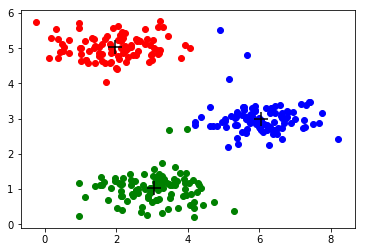

In [10]:
plt.figure()
plt.scatter(X[idx == 0, 0], X[idx == 0, 1], color='red')
plt.scatter(X[idx == 1, 0], X[idx == 1, 1], color='green')
plt.scatter(X[idx == 2, 0], X[idx == 2, 1], color='blue')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker="+", s=200)
plt.show()

### 1.3 Random initialization

In [11]:
def kMeansInitCentroids(X, K):
    rng = np.random.RandomState(0)
    idx = np.arange(X.shape[0])
    rng.shuffle(idx)
    centroids = X[idx[:K]]
    return centroids

### 1.4 Image compression with K-means

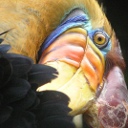

In [12]:
Image(filename='bird_small.png')

In [13]:
data = loadmat('bird_small.mat')
A = data["A"]
print(A.shape)

(128, 128, 3)


In [14]:
A = A / 255
X = A.reshape(A.shape[0] * A.shape[1], -1)
print(X.shape)

(16384, 3)


In [15]:
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
idx, centroids = runkMeans(X, initial_centroids, max_iters)
print(idx[:5])
print(centroids[:5])

[0. 0. 0. 0. 0.]
[[0.87105964 0.71310375 0.44781052]
 [0.18825202 0.18365121 0.17592184]
 [0.47697173 0.34930181 0.1956746 ]
 [0.65527778 0.48053105 0.22705474]
 [0.74235017 0.62085688 0.39412359]]


In [16]:
X_recovered = centroids[findClosestCentroids(X, centroids).astype(int)]
X_recovered = X_recovered.reshape(A.shape[0], A.shape[1], A.shape[2])
print(X_recovered.shape)

(128, 128, 3)


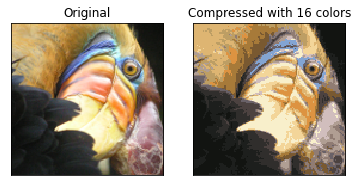

In [17]:
plt.figure()
plt.subplot(121)
plt.imshow(A)
plt.xticks([])
plt.yticks([])
plt.title("Original")
plt.subplot(122)
plt.imshow(X_recovered)
plt.xticks([])
plt.yticks([])
plt.title("Compressed with 16 colors")
plt.show()

## 2 Principal Component Analysis

### 2.1 Example Dataset

In [18]:
data = loadmat("ex7data1.mat")
X = data["X"]
print(X.shape)

(50, 2)


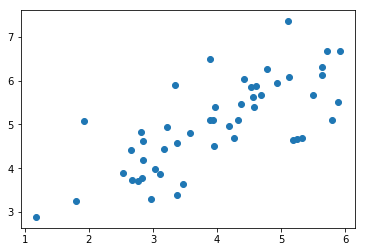

In [19]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### 2.2 Implementing PCA

In [20]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, ddof=1, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


def pca(X):
    Sigma = np.dot(X.T, X) / X.shape[0]
    U, S, _ = np.linalg.svd(Sigma)
    return U, S

In [21]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)

In [22]:
print(U[:, 0])

[-0.70710678 -0.70710678]


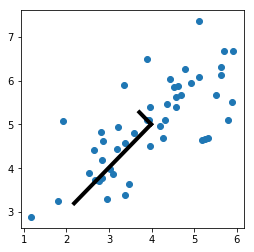

In [23]:
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1])
plt.plot([mu[0], mu[0] + 1.5 * S[0] * U[0, 0]],
         [mu[1], mu[1] + 1.5 * S[0] * U[1, 0]],
         color="black", linewidth=4)
plt.plot([mu[0], mu[0] + 1.5 * S[1] * U[0, 1]],
         [mu[1], mu[1] + 1.5 * S[1] * U[1, 1]],
         color="black", linewidth=4)
plt.show()

### 2.3 Dimensionality Reduction with PCA

In [24]:
def projectData(X, U, K):
    Z = np.dot(X, U[:, :K])
    return Z

In [25]:
K = 1
Z = projectData(X_norm, U, K)
print(Z[0])  # 1.481274

[1.48127391]


In [26]:
def recoverData(Z, U, K):
    X_rec = np.dot(Z, U[:, :K].T)
    return X_rec

In [27]:
X_rec = recoverData(Z, U, K)
print(X_rec[0])  # -1.047419 -1.047419

[-1.04741883 -1.04741883]


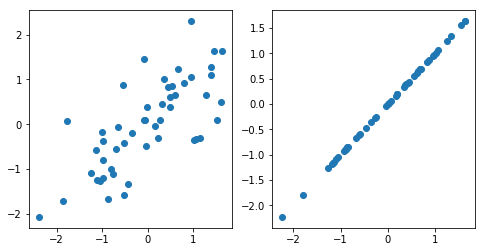

In [28]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X_norm[:, 0], X_norm[:, 1])
plt.subplot(122)
plt.scatter(X_rec[:, 0], X_rec[:, 1])
plt.show()

### 2.4 Face Image Dataset

In [29]:
data = loadmat("ex7faces.mat")
X = data["X"]
print(X.shape)

(5000, 1024)


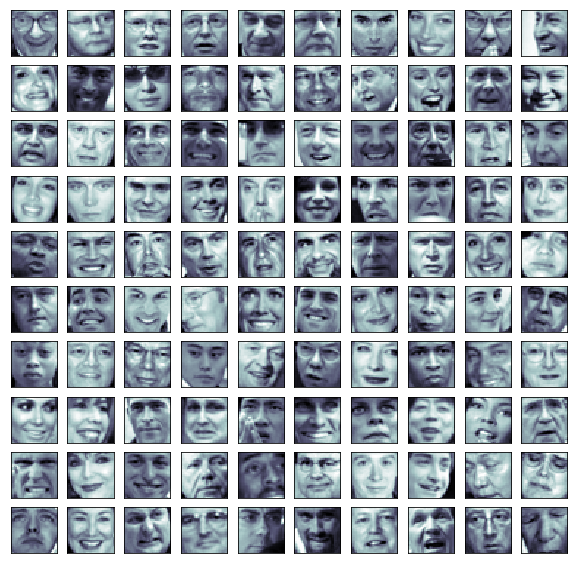

In [30]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X[i].reshape((32, 32)).T,
               cmap=plt.cm.bone, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [31]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)

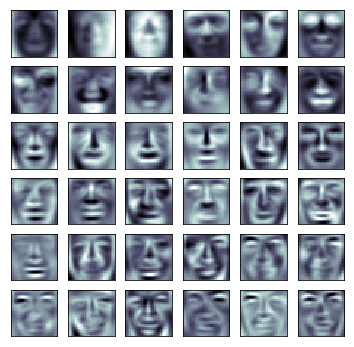

In [32]:
plt.figure(figsize=(6, 6))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.imshow(U[:, i].reshape((32, 32)).T,
               cmap=plt.cm.bone, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [33]:
K = 100
Z = projectData(X_norm, U, K)
print(Z.shape)

(5000, 100)


In [34]:
X_rec  = recoverData(Z, U, K)
print(X_rec.shape)

(5000, 1024)


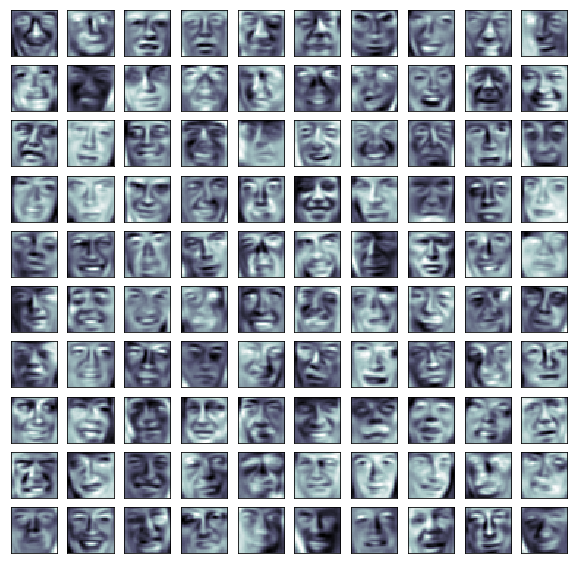

In [35]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_rec[i].reshape((32, 32)).T,
               cmap=plt.cm.bone, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

### 2.5 PCA for visualization

In [36]:
data = loadmat('bird_small.mat')
A = data["A"]
print(A.shape)

(128, 128, 3)


In [37]:
A = A / 255
X = A.reshape(A.shape[0] * A.shape[1], -1)
print(X.shape)

(16384, 3)


In [38]:
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
idx, centroids = runkMeans(X, initial_centroids, max_iters)
print(idx[:5])
print(centroids[:5])

[0. 0. 0. 0. 0.]
[[0.87105964 0.71310375 0.44781052]
 [0.18825202 0.18365121 0.17592184]
 [0.47697173 0.34930181 0.1956746 ]
 [0.65527778 0.48053105 0.22705474]
 [0.74235017 0.62085688 0.39412359]]


In [39]:
K = 2
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)
Z = projectData(X_norm, U, K)
print(Z.shape)

(16384, 2)


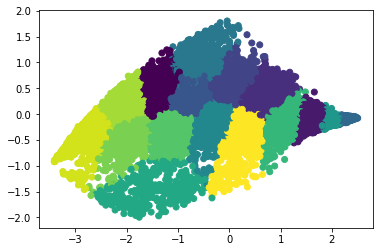

In [40]:
plt.figure()
plt.scatter(Z[:, 0], Z[:, 1], c=idx)
plt.show()